# Introduction

In this project, you will build a neural network of your own design to evaluate the MNIST dataset.

Some of the benchmark results on MNIST include can be found [on Yann LeCun's page](https://webcache.googleusercontent.com/search?q=cache:stAVPik6onEJ:yann.lecun.com/exdb/mnist) and include:

88% [Lecun et al., 1998](https://hal.science/hal-03926082/document)

95.3% [Lecun et al., 1998](https://hal.science/hal-03926082v1/document)

99.65% [Ciresan et al., 2011](http://people.idsia.ch/~juergen/ijcai2011.pdf)


MNIST is a great dataset for sanity checking your models, since the accuracy levels achieved by large convolutional neural networks and small linear models are both quite high. This makes it important to be familiar with the data.

## Installation

In [1]:
# Update the PATH to include the user installation directory. 
import os
os.environ['PATH'] = f"{os.environ['PATH']}:/root/.local/bin"

# Restart the Kernel before you move on to the next step.

#### Important: Restart the Kernel before you move on to the next step.

In [1]:
# Install requirements
!python -m pip install -r requirements.txt

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 37.1 MB 1.5 MB/s eta 0:00:01
     |████████████████████████████████| 19.3 MB 59.1 MB/s eta 0:00:01
     |████████████████████████████████| 21.0 MB 63.3 MB/s eta 0:00:01
     |████████████████████████████████| 76 kB 7.6 MB/s  eta 0:00:01
     |████████████████████████████████| 123 kB 74.6 MB/s eta 0:00:01
     |████████████████████████████████| 297 kB 65.0 MB/s eta 0:00:01
     |████████████████████████████████| 11.3 MB 66.6 MB/s eta 0:00:01
     |████████████████████████████████| 292 kB 51.1 MB/s eta 0:00:01
     |████████████████████████████████| 109 kB 60.5 MB/s eta 0:00:01
     |████████████████████████████████| 215 kB 65.6 MB/s eta 0:00:01
     |████████████████████████████████| 1.6 MB 70.2 MB/s eta 0:00:01
     |████████████████████████████████| 98 kB 11.7 MB/s eta 0:00:01
     |████████████████████████████████| 121 kB 68.5 MB/s eta 0:00:01


     |████████████████████████████████| 93 kB 2.5 MB/s  eta 0:00:01
  Created wheel for bokeh: filename=bokeh-2.1.1-py3-none-any.whl size=9257186 sha256=73a97083c74ee7f5a76010d8c1d8eade8d9a31b30f19098a2353ba67aeea1849
  Stored in directory: /root/.cache/pip/wheels/f7/55/ff/f3d7554e69382d31cf7ad857cf518af9b923134fca7d925187
Successfully built bokeh
ERROR: jupyter-console 6.6.3 has requirement ipykernel>=6.14, but you'll have ipykernel 4.10.0 which is incompatible.
ERROR: jupyter-console 6.6.3 has requirement jupyter-client>=7.0.0, but you'll have jupyter-client 6.0.0 which is incompatible.
ERROR: jupyter-console 6.6.3 has requirement jupyter-core!=5.0.*,>=4.12, but you'll have jupyter-core 4.6.3 which is incompatible.
ERROR: jupyter-console 6.6.3 has requirement prompt-toolkit>=3.0.30, but you'll have prompt-toolkit 3.0.3 which is incompatible.
ERROR: jupyter-console 6.6.3 has requirement traitlets>=5.4, but you'll have traitlets 4.3.3 which is incompatible.
  Consider adding this direc

## Imports

In [2]:
## This cell contains the essential imports you will need – DO NOT CHANGE THE CONTENTS! ##
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

## Load the Dataset

Specify your transforms as a list if you intend to .
The transforms module is already loaded as `transforms`.

MNIST is fortunately included in the torchvision module.
Then, you can create your dataset using the `MNIST` object from `torchvision.datasets` ([the documentation is available here](https://pytorch.org/vision/stable/datasets.html#mnist)).
Make sure to specify `download=True`! 

Once your dataset is created, you'll also need to define a `DataLoader` from the `torch.utils.data` module for both the train and the test set.

In [3]:
from torch.utils.data import DataLoader
# Define transforms
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

# Create training set and define training dataloader
full_train_data = torchvision.datasets.MNIST(root="data", train=True, download=True, transform=transform)

# Create validation set
validation_split = 0.2  
num_train = len(full_train_data)
num_val = int(validation_split * num_train)
num_train -= num_val  

# Create training and validation data loaders
train_data, val_data = torch.utils.data.random_split(full_train_data, [num_train, num_val])
train_loader = DataLoader(train_data, batch_size=100, shuffle=True)
val_loader = DataLoader(val_data, batch_size=100)

# Create test set and define test dataloader
test_data = torchvision.datasets.MNIST(root="data", train=False, download=True, transform=transform)
test_loader = DataLoader(test_data, batch_size=100)

/opt/conda/lib/python3.7/site-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writable, and PyTorch does not support non-writable tensors. This means writing to this tensor will result in undefined behavior. You may want to copy the array to protect its data or make it writable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ../torch/csrc/utils/tensor_numpy.cpp:178.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


## Justify your preprocessing

In your own words, why did you choose the transforms you chose? If you didn't use any preprocessing steps, why not?

The image data is converted into PyTorch tensors to allow for efficient processing of data and standardizes the data format. While the pixel values of the image data is normalize to speed up the training process and improve model's generalization.

## Explore the Dataset
Using matplotlib, numpy, and torch, explore the dimensions of your data.

You can view images using the `show5` function defined below – it takes a data loader as an argument.
Remember that normalized images will look really weird to you! You may want to try changing your transforms to view images.
Typically using no transforms other than `toTensor()` works well for viewing – but not as well for training your network.
If `show5` doesn't work, go back and check your code for creating your data loaders and your training/test sets.

In [4]:
## This cell contains a function for showing 5 images from a dataloader – DO NOT CHANGE THE CONTENTS! ##
def show5(img_loader):
    dataiter = iter(img_loader)
    
    batch = next(dataiter)
    labels = batch[1][0:5]
    images = batch[0][0:5]
    for i in range(5):
        print(int(labels[i].detach()))
    
        image = images[i].numpy()
        plt.imshow(image.T.squeeze().T)
        plt.show()

Number of MNIST train data: 48000
Number of MNIST validation data: 12000
Number of MNIST test data: 10000
number of images: torch.Size([100, 1, 28, 28])
number of labels: torch.Size([100])
7


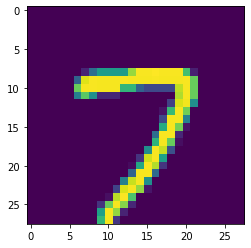

3


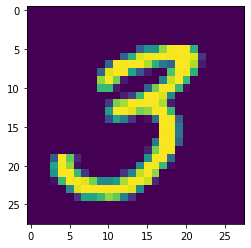

9


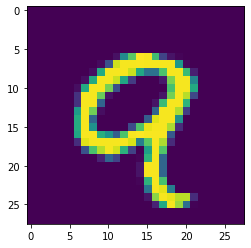

2


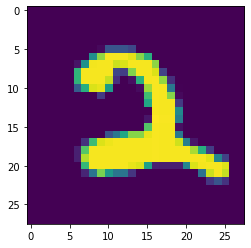

0


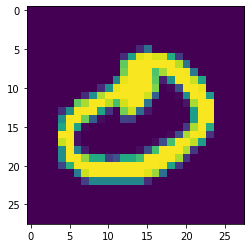

In [5]:
# Explore data
print("Number of MNIST train data: {}".format(len(train_data)))
print("Number of MNIST validation data: {}".format(len(val_data)))
print("Number of MNIST test data: {}".format(len(test_data)))

dataiter = iter(train_loader)
images, labels = next(dataiter)

print("number of images: {}".format(images.shape))
print("number of labels: {}".format(labels.shape))

show5(train_loader)

## Build your Neural Network
Using the layers in `torch.nn` (which has been imported as `nn`) and the `torch.nn.functional` module (imported as `F`), construct a neural network based on the parameters of the dataset.
Use any architecture you like. 

*Note*: If you did not flatten your tensors in your transforms or as part of your preprocessing and you are using only `Linear` layers, make sure to use the `Flatten` layer in your network!

In [6]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.activation = F.relu
        self.layer1 = nn.Linear(28 * 28, 128)
        self.layer2 = nn.Linear(128, 64)
        self.layer3 = nn.Linear(64, 10)
        
    def forward(self, x):
        x = torch.flatten(x, 1)
        x = self.activation(self.layer1(x))
        x = self.activation(self.layer2(x))
        x = self.layer3(x)
        return x
        
net = Net() 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
net.to(device)

Net(
  (layer1): Linear(in_features=784, out_features=128, bias=True)
  (layer2): Linear(in_features=128, out_features=64, bias=True)
  (layer3): Linear(in_features=64, out_features=10, bias=True)
)

Specify a loss function and an optimizer, and instantiate the model.

If you use a less common loss function, please note why you chose that loss function in a comment.

In [7]:
optimizer = optim.Adam(net.parameters(), lr=0.001)

criterion = nn.CrossEntropyLoss()

## Running your Neural Network
Use whatever method you like to train your neural network, and ensure you record the average loss at each epoch. 
Don't forget to use `torch.device()` and the `.to()` method for both your model and your data if you are using GPU!

If you want to print your loss **during** each epoch, you can use the `enumerate` function and print the loss after a set number of batches. 250 batches works well for most people!

In [8]:
num_epochs = 10

train_loss_history = list()
val_loss_history = list()

for epoch in range(num_epochs):
    net.train()
    train_loss = 0.0
    train_correct = 0
    for i, data in enumerate(train_loader):
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        
        optimizer.zero_grad()
        
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        
        loss.backward()
        optimizer.step()
        
        _, preds = torch.max(outputs.data, 1)
        train_correct += (preds == labels).sum().item()
        train_loss += loss.item()
    print(f'Epoch {epoch + 1} training accuracy: {train_correct/len(train_loader):.2f}% training loss: {train_loss/len(train_loader):.5f}')
    train_loss_history.append(train_loss/len(train_loader))
    
    val_loss = 0.0
    val_correct = 0
    net.eval()
    for inputs, labels in val_loader:
        if torch.cuda.is_available():
            inputs, labels = inputs.cuda(), labels.cuda()
            
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        
        _, preds = torch.max(outputs.data, 1)
        val_correct += (preds == labels).sum().item()
        val_loss += loss.item()
    print(f'Epoch {epoch + 1} validation accuracy: {val_correct/len(val_loader):.2f}% validation loss: {val_loss/len(val_loader):.5f}')
    val_loss_history.append(val_loss/len(val_loader))

Epoch 1 training accuracy: 86.26% training loss: 0.46914
Epoch 1 validation accuracy: 91.09% validation loss: 0.29202
Epoch 2 training accuracy: 92.84% training loss: 0.23908
Epoch 2 validation accuracy: 93.30% validation loss: 0.22022
Epoch 3 training accuracy: 94.69% training loss: 0.17743
Epoch 3 validation accuracy: 94.47% validation loss: 0.17934
Epoch 4 training accuracy: 95.88% training loss: 0.13703
Epoch 4 validation accuracy: 93.34% validation loss: 0.22515
Epoch 5 training accuracy: 96.49% training loss: 0.11617
Epoch 5 validation accuracy: 96.09% validation loss: 0.13027
Epoch 6 training accuracy: 97.01% training loss: 0.09712
Epoch 6 validation accuracy: 96.57% validation loss: 0.11297
Epoch 7 training accuracy: 97.30% training loss: 0.08360
Epoch 7 validation accuracy: 96.64% validation loss: 0.11109
Epoch 8 training accuracy: 97.59% training loss: 0.07481
Epoch 8 validation accuracy: 96.73% validation loss: 0.10991
Epoch 9 training accuracy: 97.82% training loss: 0.06769

Plot the training loss (and validation loss/accuracy, if recorded).

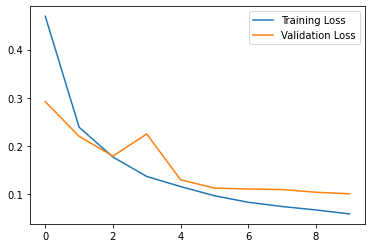

In [9]:
plt.plot(train_loss_history, label="Training Loss")
plt.plot(val_loss_history, label="Validation Loss")
plt.legend()
plt.show()

## Testing your model
Using the previously created `DataLoader` for the test set, compute the percentage of correct predictions using the highest probability prediction. 

If your accuracy is over 90%, great work, but see if you can push a bit further! 
If your accuracy is under 90%, you'll need to make improvements.
Go back and check your model architecture, loss function, and optimizer to make sure they're appropriate for an image classification task.

In [10]:
for epoch in range(num_epochs):
    test_loss = 0.0
    test_correct = 0
    net.eval()
    for i, data in enumerate(test_loader):
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        
        optimizer.zero_grad()
        
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        
        loss.backward()
        optimizer.step()
        
        _, preds = torch.max(outputs.data, 1)
        test_correct += (preds == labels).sum().item()
        test_loss += loss.item()
    print(f'Epoch {epoch + 1} test accuracy: {test_correct/len(test_loader):.2f}% test loss: {test_loss/len(test_loader):.5f}')

Epoch 1 test accuracy: 95.83% test loss: 0.13497
Epoch 2 test accuracy: 96.86% test loss: 0.09043
Epoch 3 test accuracy: 97.28% test loss: 0.07799
Epoch 4 test accuracy: 98.24% test loss: 0.05287
Epoch 5 test accuracy: 98.41% test loss: 0.04558
Epoch 6 test accuracy: 98.89% test loss: 0.03496
Epoch 7 test accuracy: 99.36% test loss: 0.02249
Epoch 8 test accuracy: 99.56% test loss: 0.01858
Epoch 9 test accuracy: 99.82% test loss: 0.01265
Epoch 10 test accuracy: 99.82% test loss: 0.01158


## Improving your model

Once your model is done training, try tweaking your hyperparameters and training again below to improve your accuracy on the test set!

In [11]:
# Added dropout
class Net2(nn.Module):
    def __init__(self):
        super(Net2, self).__init__()
        self.activation = F.relu
        self.layer1 = nn.Linear(28 * 28, 128)
        self.layer2 = nn.Linear(128, 64)
        self.layer3 = nn.Linear(64, 10)
        
        self.dropout = nn.Dropout(0.2)
        
    def forward(self, x):
        x = torch.flatten(x, 1)
        x = self.activation(self.layer1(x))
        x = self.activation(self.layer2(x))
        x = self.layer3(x)
        return x
        
net2 = Net2() 
net2.to(device)

Net2(
  (layer1): Linear(in_features=784, out_features=128, bias=True)
  (layer2): Linear(in_features=128, out_features=64, bias=True)
  (layer3): Linear(in_features=64, out_features=10, bias=True)
  (dropout): Dropout(p=0.2, inplace=False)
)

In [12]:
optimizer = optim.Adam(net2.parameters(), lr=0.001)

criterion = nn.CrossEntropyLoss()

In [13]:
num_epochs = 10

train_loss_history = list()
val_loss_history = list()

for epoch in range(num_epochs):
    net2.train()
    train_loss = 0.0
    train_correct = 0
    for i, data in enumerate(train_loader):
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        
        optimizer.zero_grad()
        
        outputs = net2(inputs)
        loss = criterion(outputs, labels)
        
        loss.backward()
        optimizer.step()
        
        _, preds = torch.max(outputs.data, 1)
        train_correct += (preds == labels).sum().item()
        train_loss += loss.item()
    print(f'Epoch {epoch + 1} training accuracy: {train_correct/len(train_loader):.2f}% training loss: {train_loss/len(train_loader):.5f}')
    train_loss_history.append(train_loss/len(train_loader))
    
    val_loss = 0.0
    val_correct = 0
    net2.eval()
    for inputs, labels in val_loader:
        if torch.cuda.is_available():
            inputs, labels = inputs.cuda(), labels.cuda()
            
        outputs = net2(inputs)
        loss = criterion(outputs, labels)
        
        _, preds = torch.max(outputs.data, 1)
        val_correct += (preds == labels).sum().item()
        val_loss += loss.item()
    print(f'Epoch {epoch + 1} validation accuracy: {val_correct/len(val_loader):.2f}% validation loss: {val_loss/len(val_loader):.5f}')
    val_loss_history.append(val_loss/len(val_loader))

Epoch 1 training accuracy: 87.08% training loss: 0.45738
Epoch 1 validation accuracy: 91.40% validation loss: 0.28927
Epoch 2 training accuracy: 93.11% training loss: 0.22713
Epoch 2 validation accuracy: 93.94% validation loss: 0.19948
Epoch 3 training accuracy: 94.82% training loss: 0.16849
Epoch 3 validation accuracy: 94.70% validation loss: 0.16585
Epoch 4 training accuracy: 95.94% training loss: 0.13322
Epoch 4 validation accuracy: 95.68% validation loss: 0.13756
Epoch 5 training accuracy: 96.68% training loss: 0.10858
Epoch 5 validation accuracy: 95.95% validation loss: 0.13364
Epoch 6 training accuracy: 97.10% training loss: 0.09459
Epoch 6 validation accuracy: 96.10% validation loss: 0.12814
Epoch 7 training accuracy: 97.37% training loss: 0.08198
Epoch 7 validation accuracy: 96.53% validation loss: 0.11065
Epoch 8 training accuracy: 97.65% training loss: 0.07555
Epoch 8 validation accuracy: 96.88% validation loss: 0.10549
Epoch 9 training accuracy: 98.06% training loss: 0.06307

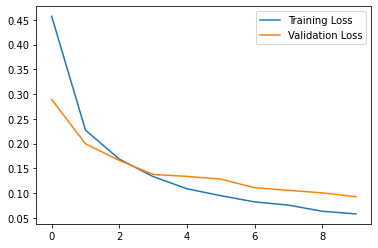

In [14]:
plt.plot(train_loss_history, label="Training Loss")
plt.plot(val_loss_history, label="Validation Loss")
plt.legend()
plt.show()

In [15]:
for epoch in range(num_epochs):
    test_loss = 0.0
    test_correct = 0
    net2.eval()
    for i, data in enumerate(test_loader):
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        
        optimizer.zero_grad()
        
        outputs = net2(inputs)
        loss = criterion(outputs, labels)
        
        loss.backward()
        optimizer.step()
        
        _, preds = torch.max(outputs.data, 1)
        test_correct += (preds == labels).sum().item()
        test_loss += loss.item()
    print(f'Epoch {epoch + 1} test accuracy: {test_correct/len(test_loader):.2f}% test loss: {test_loss/len(test_loader):.5f}')

Epoch 1 test accuracy: 96.16% test loss: 0.12691
Epoch 2 test accuracy: 97.03% test loss: 0.08883
Epoch 3 test accuracy: 97.94% test loss: 0.06212
Epoch 4 test accuracy: 98.47% test loss: 0.04838
Epoch 5 test accuracy: 98.90% test loss: 0.03601
Epoch 6 test accuracy: 99.22% test loss: 0.02555
Epoch 7 test accuracy: 99.67% test loss: 0.01742
Epoch 8 test accuracy: 99.68% test loss: 0.01441
Epoch 9 test accuracy: 99.89% test loss: 0.01081
Epoch 10 test accuracy: 99.92% test loss: 0.00874


## Saving your model
Using `torch.save`, save your model for future loading.

In [16]:
import os

# Check if the file exists and delete it if it does
if os.path.exists("Model1.pth"):
    os.remove("Model1.pth")
    torch.save(Net, "Model1.pth")
    
# Check if the file exists and delete it if it does
if os.path.exists("Model2.pth"):
    os.remove("Model2.pth")
    torch.save(Net2, "Model2.pth")